<a href="https://colab.research.google.com/github/Manav-Khandurie/Breast-Cancer-ML-Models/blob/main/BreastCancerMLModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Prediction
This notebook contains code for all the models used for project

# Data Collection
The dataset used in this analysis is present at
https://www.kaggle.com/datasets/reihanenamdari/breast-cancer/code

In [4]:
# Imp Libaray
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Assuming 'df' is your DataFrame
df = pd.read_csv("/content/sample_data/breast-cancer.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **Data PreProcessing**

## **Data Cleaning**

In [10]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Removing duplicates
data = df.drop_duplicates()


Missing values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [12]:
df.head()
df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 32 columns]

## **Label Encoding**

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Label encoding for target variable
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

In [15]:
df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [16]:
df.tail()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424          1        21.56         22.39          142.00     1479.0   
565  926682          1        20.13         28.25          131.20     1261.0   
566  926954          1        16.60         28.08          108.30      858.1   
567  927241          1        20.60         29.33          140.10     1265.0   
568   92751          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 32 columns]

In [17]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## **Data Scaling**

In [18]:
# Split features and target variable
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)
print(y)

[[-0.23640517  1.09706398 -2.07333501 ...  2.29607613  2.75062224
   1.93701461]
 [-0.23640344  1.82982061 -0.35363241 ...  1.0870843  -0.24388967
   0.28118999]
 [ 0.43174109  1.57988811  0.45618695 ...  1.95500035  1.152255
   0.20139121]
 ...
 [-0.23572747  0.70228425  2.0455738  ...  0.41406869 -1.10454895
  -0.31840916]
 [-0.23572517  1.83834103  2.33645719 ...  2.28998549  1.91908301
   2.21963528]
 [-0.24240586 -1.80840125  1.22179204 ... -1.74506282 -0.04813821
  -0.75120669]]
0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


## **Data Spliting**

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [20]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train = imputer.fit_transform(X_train)

# Transform the testing data using the trained imputer
X_test = imputer.transform(X_test)
print(y_train,y_test)
print(X_train.shape[1]);

68     0
181    1
63     0
248    0
60     0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 455, dtype: int64 204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64
31


# **Exploratory Data Analysis (EDA)**


## **Descriptive Stats**

In [21]:
df.describe().transpose()

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
diagnosis                569.0  3.725835e-01  4.839180e-01     0.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
diagnosis                     0.000000       0.000000  1.000000e+00   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.3

## **Scatter Plot**

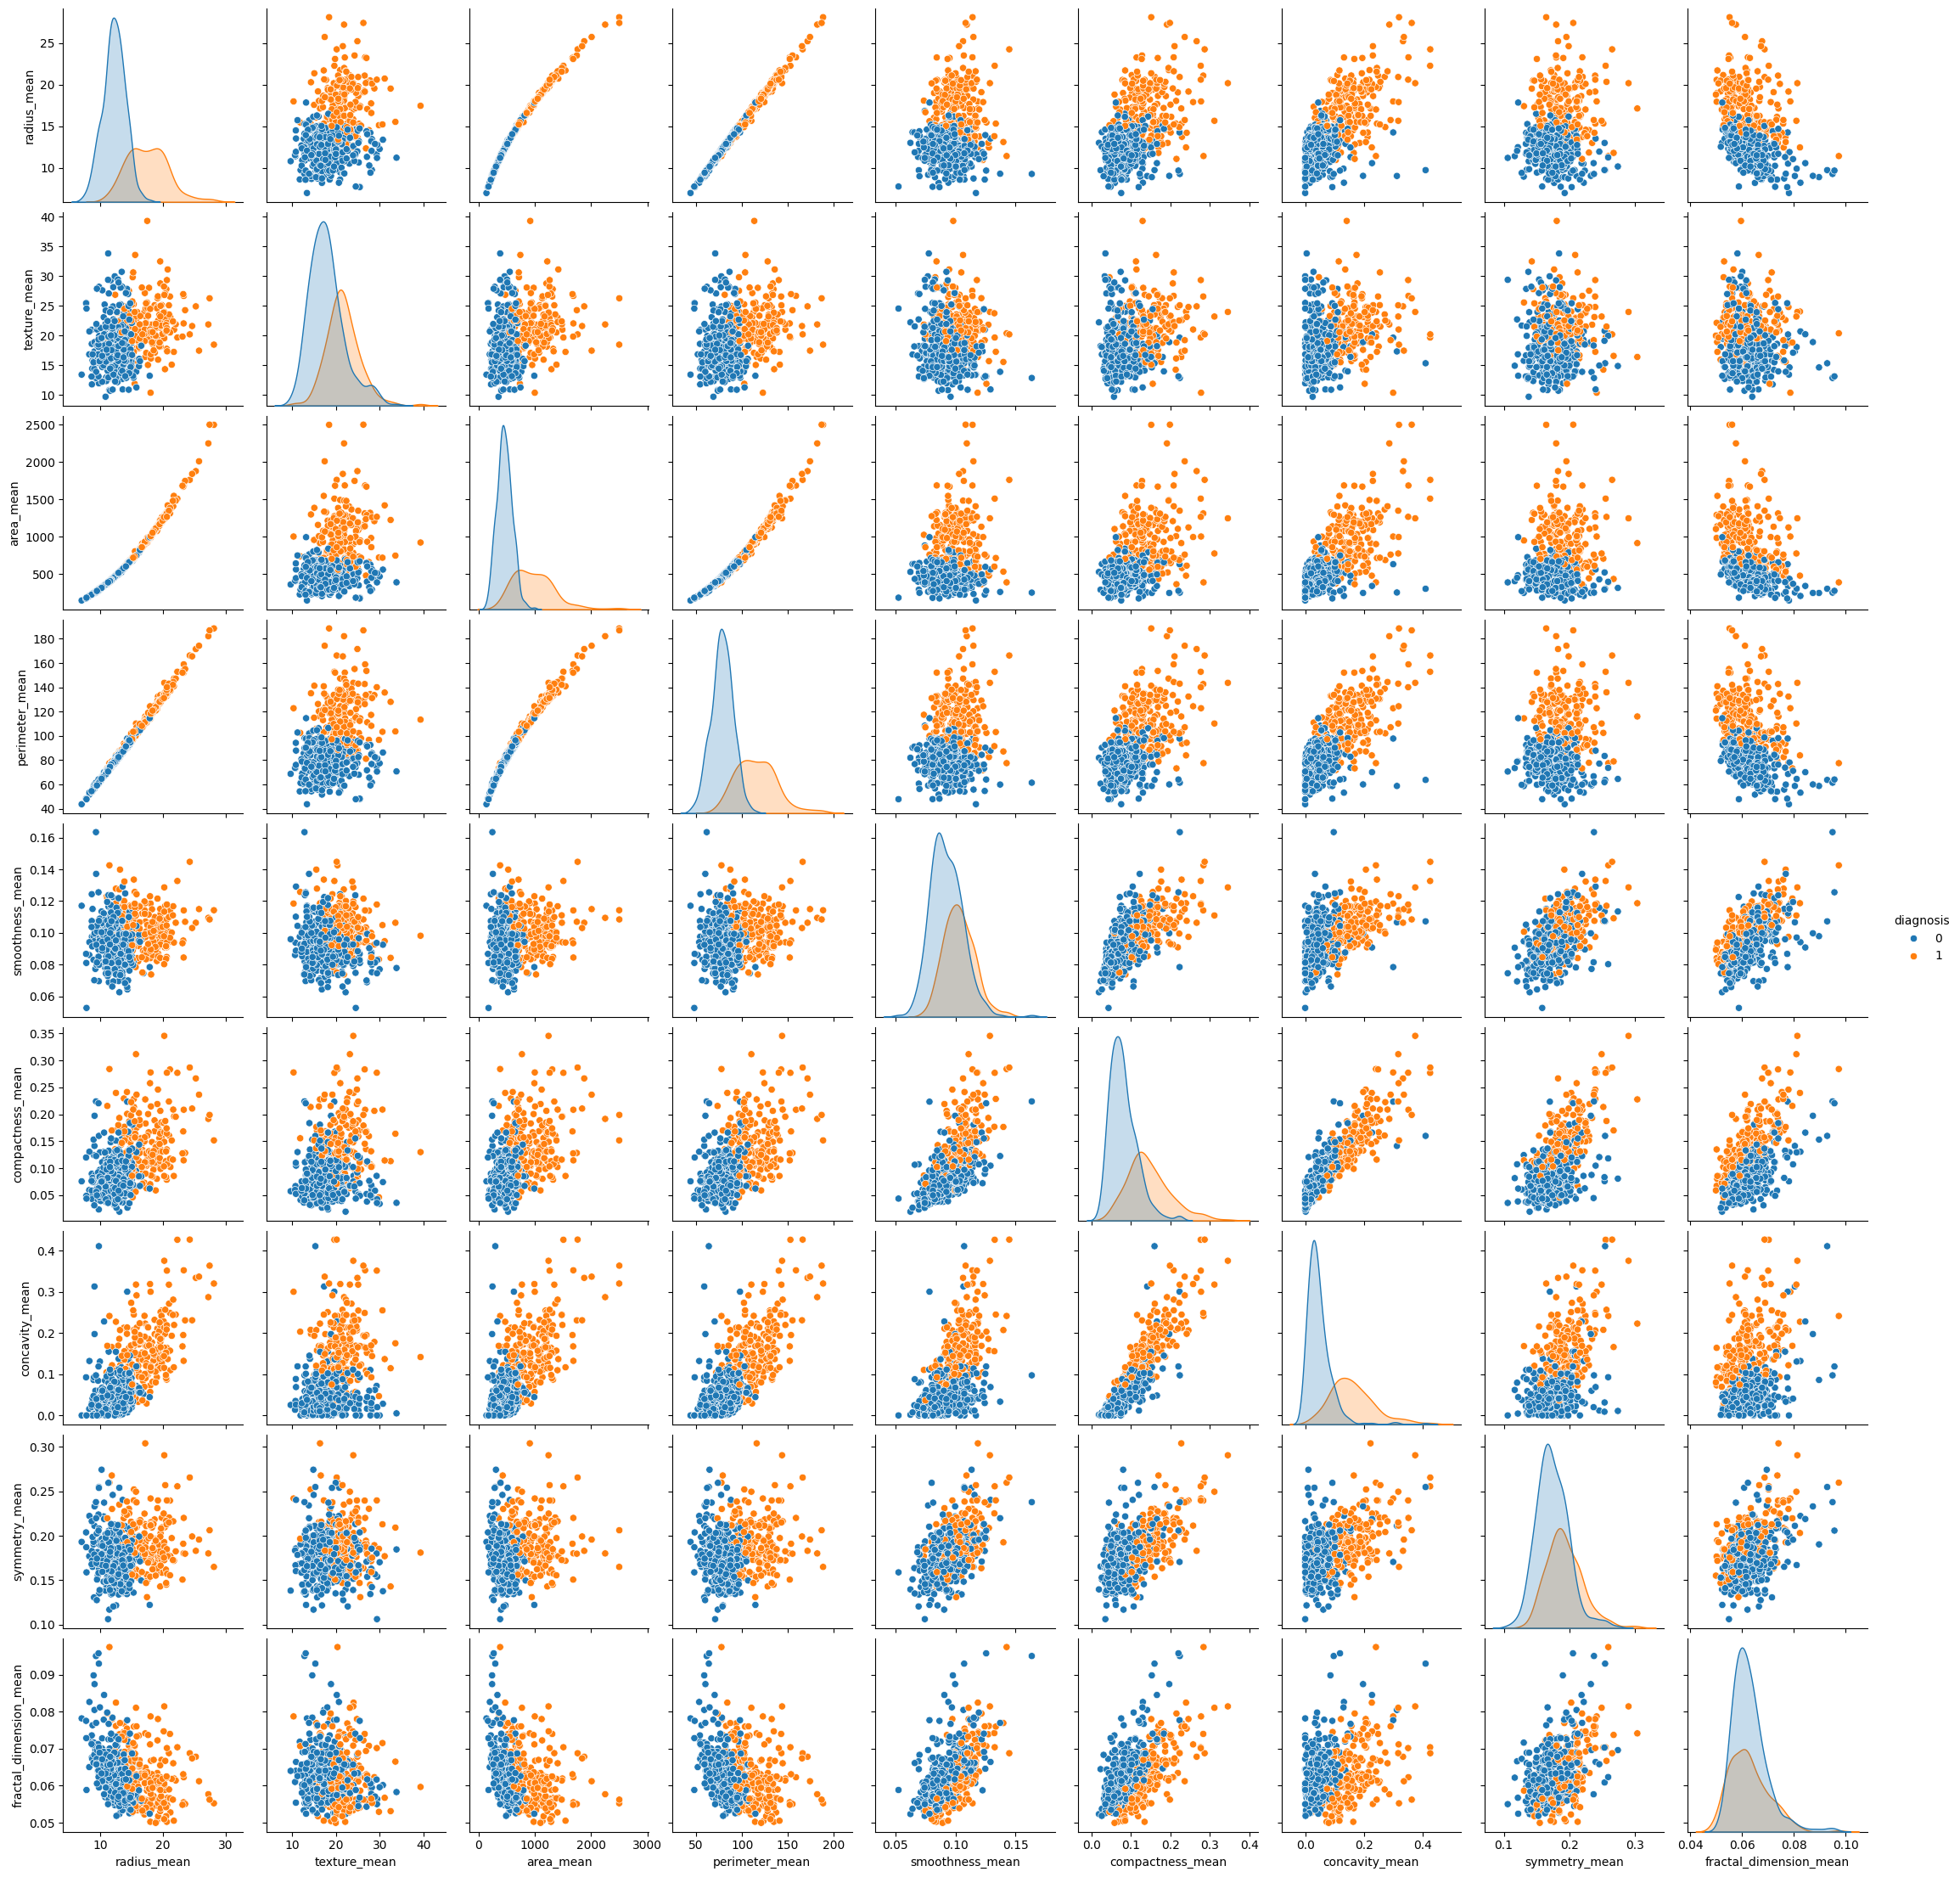

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Explore the dataset
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean','smoothness_mean','compactness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean'])
plt.show()



## **Count Plot**

<Axes: xlabel='diagnosis', ylabel='count'>

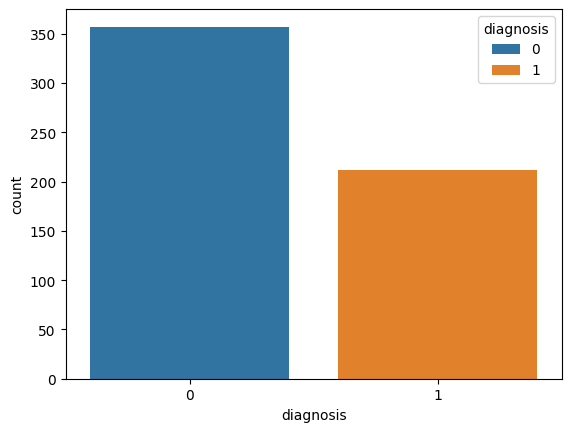

In [23]:
sns.countplot(x='diagnosis' , hue='diagnosis', data=df)

## **Corelation Matrix**

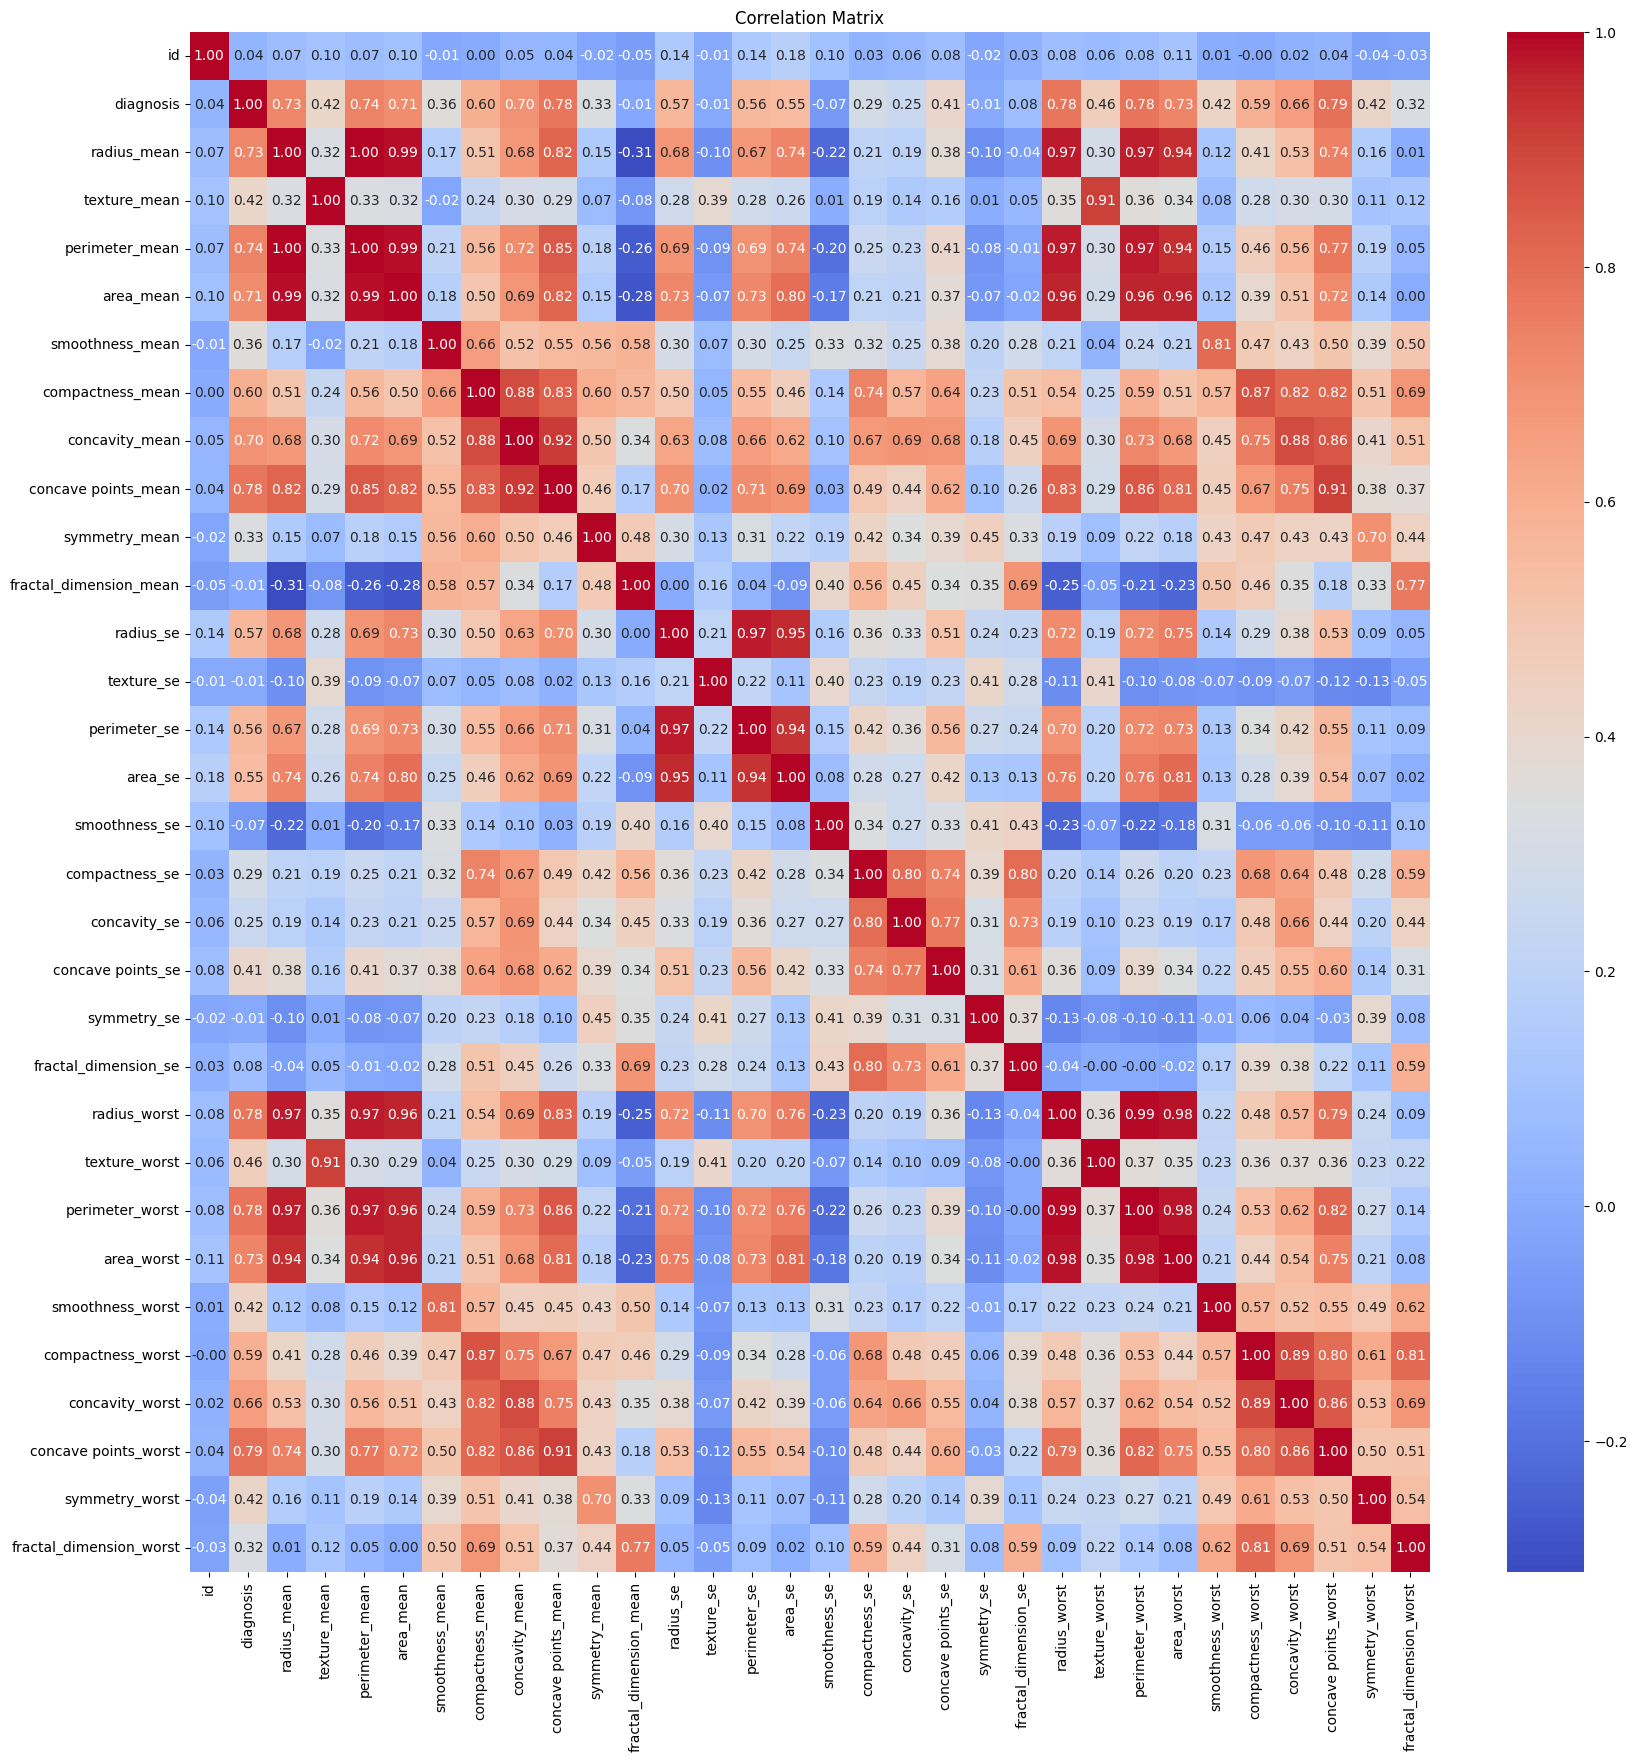

In [24]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

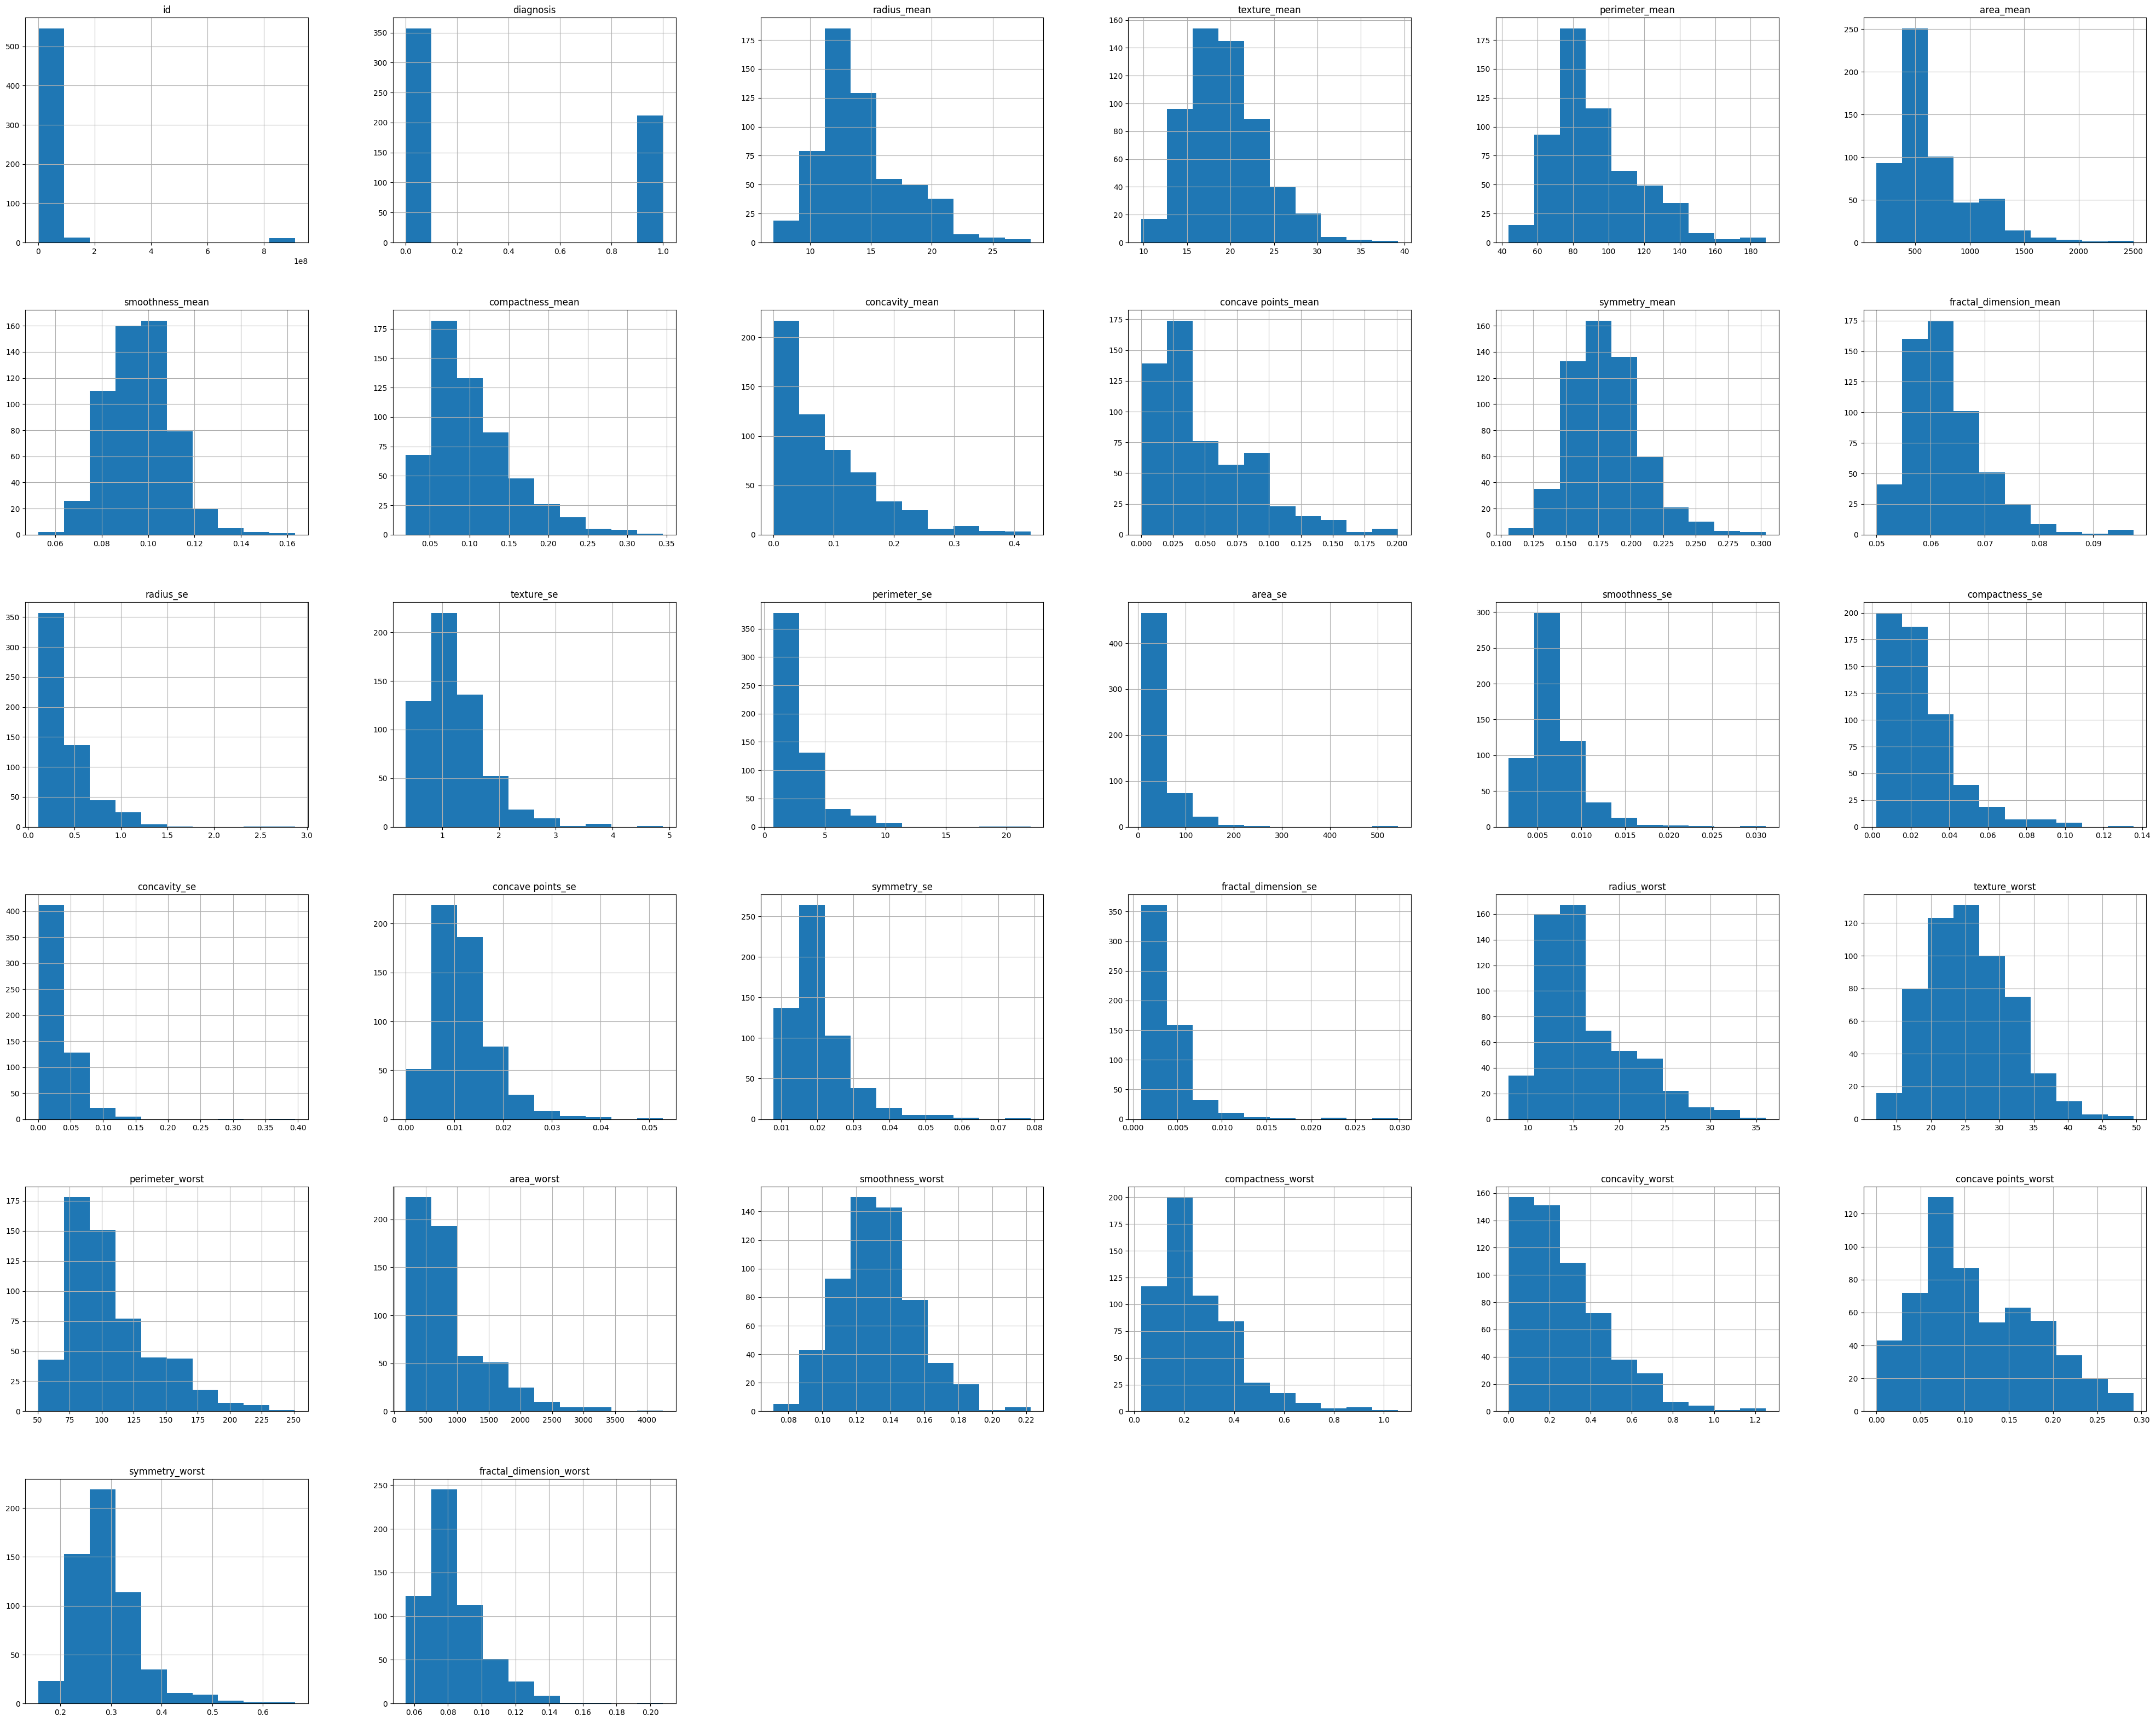

In [25]:
df.hist(figsize=(50, 40))
plt.show()

# **Model Training & Testing**

## **initialization**

Initialising separate dictionaries to store the test results for later analysis and comparison

In [26]:
RFC={};
SVM={};
KNN={};
XGB={};
LR={};
ANN={};

## **Random Forests**

### RFC Model Trainning - No Tuning

In [27]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import time

start_time=time.time()
# Initialize Random Forest classifier without hyperparameter tuning
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)
end_time=time.time();
total_time=end_time-start_time;

# Make predictions on the testing set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, pos_label=1)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_auc_roc = roc_auc_score(y_test, rf_predictions)

# Print evaluation metrics
print("Random Forest Classifier Evaluation without Hyperparameter Tuning:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print(f"AUC-ROC Score: {rf_auc_roc}")
print(f'Training Time: {total_time}');



Random Forest Classifier Evaluation without Hyperparameter Tuning:
Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1 Score: 0.9523809523809524
AUC-ROC Score: 0.9580740255486406
Training Time: 0.25501465797424316



### RFC Model Trainning - HyperParameter Tuning

In [28]:
import joblib
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

start_time_rf=time.time()


# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_model_rf = RandomForestClassifier(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model_rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_

end_time_rf=time.time();
total_time_rf=end_time_rf-start_time_rf;


# Print the best parameters
print("Best Hyperparameters:")
print(best_params_rf)


# Save the trained model as a joblib file
joblib.dump(best_estimator_rf, 'RFC-Model.joblib')


Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


['RFC-Model.joblib']

### **RFC Model Testing**

In [29]:
# Make predictions on the testing set using the best estimator
best_predictions = best_estimator_rf.predict(X_test)

# Evaluate the model with best parameters
best_accuracy_rf = accuracy_score(y_test, best_predictions)
best_precision_rf = precision_score(y_test, best_predictions)
best_recall_rf = recall_score(y_test, best_predictions)
best_f1_rf = f1_score(y_test, best_predictions)
best_auc_roc_rf = roc_auc_score(y_test, best_predictions)

RFC['best_accuracy']=best_accuracy_rf;
RFC['best_precision']=best_precision_rf;
RFC['best_recall']=best_recall_rf;
RFC['best_f1']=best_f1_rf;
RFC['best_auc_roc']=best_auc_roc_rf;
RFC['total_time']=total_time_rf;

# Print evaluation metrics
print("\nRandom Forest Classifier with Best Hyperparameters Evaluation:")
print(f"Accuracy: {best_accuracy_rf}")
print(f"Precision: {best_precision_rf}")
print(f"Recall: {best_recall_rf}")
print(f"F1 Score: {best_f1_rf}")
print(f"AUC-ROC Score: {best_auc_roc_rf}")
print(f'Training Time: {total_time_rf}');
print(RFC);


Random Forest Classifier with Best Hyperparameters Evaluation:
Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1 Score: 0.9523809523809524
AUC-ROC Score: 0.9580740255486406
Training Time: 117.32991218566895
{'best_accuracy': 0.9649122807017544, 'best_precision': 0.975609756097561, 'best_recall': 0.9302325581395349, 'best_f1': 0.9523809523809524, 'best_auc_roc': 0.9580740255486406, 'total_time': 117.32991218566895}


## **SVM**

### SVM Model Trainning - No Tuning

In [121]:
from sklearn.svm import SVC
import time
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


start_time = time.time()

# Initialize SVM classifier without hyperparameter tuning
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

end_time = time.time()
total_time = end_time - start_time

# Make predictions on the testing set
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
svm_auc_roc = roc_auc_score(y_test, svm_predictions)

# Print evaluation metrics
print("SVM Classifier Evaluation without Hyperparameter Tuning:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")
print(f"AUC-ROC Score: {svm_auc_roc}")
print(f'Training Time: {total_time}')


SVM Classifier Evaluation without Hyperparameter Tuning:
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9534883720930233
F1 Score: 0.9761904761904763
AUC-ROC Score: 0.9767441860465116
Training Time: 0.014764785766601562


### SVM Model Trainning - HyperParameter Tuning

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

start_time = time.time()

# Define the reduced hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

# Initialize SVM classifier
svm_model = SVC(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

end_time = time.time()
total_time_svm = end_time - start_time

# Print the best parameters
print("Best Hyperparameters:")
print(best_params)


# Save the trained model as a joblib file
joblib.dump(best_estimator, 'SVM-Model.joblib')


Best Hyperparameters:
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


['SVM-Model.joblib']

### **SVM Model Testing**

In [124]:
# Make predictions on the testing set using the best estimator
best_predictions = best_estimator.predict(X_test)

# Evaluate the model with best parameters
best_accuracy_svm = accuracy_score(y_test, best_predictions)
best_precision_svm = precision_score(y_test, best_predictions)
best_recall_svm = recall_score(y_test, best_predictions)
best_f1_svm = f1_score(y_test, best_predictions)
best_auc_roc_svm = roc_auc_score(y_test, best_predictions)

SVM['best_accuracy']=best_accuracy_svm;
SVM['best_precision']=best_precision_svm;
SVM['best_recall']=best_recall_svm;
SVM['best_f1']=best_f1_svm;
SVM['best_auc_roc']=best_auc_roc_svm;
SVM['total_time']=total_time_svm;

# Print evaluation metrics
print("\nSVM with Best Hyperparameters Evaluation:")
print(f"Accuracy: {best_accuracy_svm}")
print(f"Precision: {best_precision_svm}")
print(f"Recall: {best_recall_svm}")
print(f"F1 Score: {best_f1_svm}")
print(f"AUC-ROC Score: {best_auc_roc_svm}")
print(f'Training Time: {total_time_svm}');
print(SVM)


SVM with Best Hyperparameters Evaluation:
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9534883720930233
F1 Score: 0.9761904761904763
AUC-ROC Score: 0.9767441860465116
Training Time: 0.2256910800933838
{'best_accuracy': 0.9824561403508771, 'best_precision': 1.0, 'best_recall': 0.9534883720930233, 'best_f1': 0.9761904761904763, 'best_auc_roc': 0.9767441860465116, 'total_time': 0.2256910800933838}


## **KNN**

### **KNN Model Trainning - No Tuning**

In [125]:
from sklearn.neighbors import KNeighborsClassifier
import time

start_time = time.time()

# Initialize KNN classifier without hyperparameter tuning
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

end_time = time.time()
total_time = end_time - start_time

# Make predictions on the testing set
knn_predictions = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
knn_auc_roc = roc_auc_score(y_test, knn_predictions)

# Print evaluation metrics
print("KNN Classifier Evaluation without Hyperparameter Tuning:")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1 Score: {knn_f1}")
print(f"AUC-ROC Score: {knn_auc_roc}")
print(f'Training Time: {total_time}')


KNN Classifier Evaluation without Hyperparameter Tuning:
Accuracy: 0.9473684210526315
Precision: 0.9302325581395349
Recall: 0.9302325581395349
F1 Score: 0.9302325581395349
AUC-ROC Score: 0.9439895185063871
Training Time: 0.002819538116455078


### **KNN Model Trainning - HyperParameter Tuning**

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize KNN classifier
knn_model = KNeighborsClassifier()

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

end_time = time.time()
total_time_knn = end_time - start_time

# Print the best parameters
print("Best Hyperparameters:")
print(best_params)


# Save the trained model as a joblib file
joblib.dump(best_estimator, 'KNN-Model.joblib')


Best Hyperparameters:
{'algorithm': 'auto', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


['KNN-Model.joblib']

### **KNN Model Testing**

In [127]:
# Make predictions on the testing set using the best estimator
best_predictions = best_estimator.predict(X_test)

# Evaluate the model with best parameters
best_accuracy_knn = accuracy_score(y_test, best_predictions)
best_precision_knn = precision_score(y_test, best_predictions)
best_recall_knn = recall_score(y_test, best_predictions)
best_f1_knn = f1_score(y_test, best_predictions)
best_auc_roc_knn = roc_auc_score(y_test, best_predictions)

KNN['best_accuracy']=best_accuracy_knn;
KNN['best_precision']=best_precision_knn;
KNN['best_recall']=best_recall_knn;
KNN['best_f1']=best_f1_knn;
KNN['best_auc_roc']=best_auc_roc_knn;
KNN['total_time']=total_time;

# Print evaluation metrics
print("KNN with Best Hyperparameters Evaluation:")
print(f"Accuracy: {best_accuracy_knn}")
print(f"Precision: {best_precision_knn}")
print(f"Recall: {best_recall_knn}")
print(f"F1 Score: {best_f1_knn}")
print(f"AUC-ROC Score: {best_auc_roc_knn}")
print(f'Training Time: {total_time}');
print(KNN)

KNN with Best Hyperparameters Evaluation:
Accuracy: 0.9473684210526315
Precision: 0.9302325581395349
Recall: 0.9302325581395349
F1 Score: 0.9302325581395349
AUC-ROC Score: 0.9439895185063871
Training Time: 0.002819538116455078
{'best_accuracy': 0.9473684210526315, 'best_precision': 0.9302325581395349, 'best_recall': 0.9302325581395349, 'best_f1': 0.9302325581395349, 'best_auc_roc': 0.9439895185063871, 'total_time': 0.002819538116455078}


## **XGB**

### **XGB Model Trainning - No Tuning**

In [90]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

# Start timing
start_time = time.time()

# Initialize XGBoost classifier without hyperparameter tuning
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the testing set
xgb_predictions = xgb_model.predict(X_test)

# End timing
end_time = time.time()
total_time = end_time - start_time

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)
xgb_auc_roc = roc_auc_score(y_test, xgb_predictions)

# Print evaluation metrics
print("XGBoost Classifier Evaluation without Hyperparameter Tuning:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1 Score: {xgb_f1}")
print(f"AUC-ROC Score: {xgb_auc_roc}")
print(f"Training Time: {total_time} seconds")

XGBoost Classifier Evaluation without Hyperparameter Tuning:
Accuracy: 0.956140350877193
Precision: 0.9523809523809523
Recall: 0.9302325581395349
F1 Score: 0.9411764705882352
AUC-ROC Score: 0.9510317720275139
Training Time: 0.2129058837890625 seconds


### **XGB Model Trainning - HyperParameter Tuning**

In [89]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import time

# Start timing
start_time = time.time()

# Define the parameter distributions for tuning
param_dist = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1]
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Perform RandomizedSearchCV with 5-fold cross-validation and 100 iterations
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Train the model with the best parameters
best_estimator = xgb.XGBClassifier(**best_params, random_state=42)
best_estimator.fit(X_train, y_train)

# End timing
end_time = time.time()
total_time_xgb = end_time - start_time

# Print the best parameters and test accuracy
print("Best Hyperparameters:")
print(best_params)

# Save the trained model as a joblib file
joblib.dump(best_estimator, 'XGB-Model.joblib')


Best Hyperparameters:
{'subsample': 0.5, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.5}


['XGB-Model.joblib']

### **XGB Model Testing**

In [91]:
# Make predictions on the testing set using the best estimator
best_predictions = best_estimator.predict(X_test)

# Evaluate the model with best parameters
best_accuracy_xgb = accuracy_score(y_test, best_predictions)
best_precision_xgb = precision_score(y_test, best_predictions)
best_recall_xgb = recall_score(y_test, best_predictions)
best_f1_xgb = f1_score(y_test, best_predictions)
best_auc_roc_xgb = roc_auc_score(y_test, best_predictions)

XGB['best_accuracy']=best_accuracy_xgb;
XGB['best_precision']=best_precision_xgb;
XGB['best_recall']=best_recall_xgb;
XGB['best_f1']=best_f1_xgb;
XGB['best_auc_roc']=best_auc_roc_xgb;
XGB['total_time']=total_time_xgb;

# Print evaluation metrics
print("\nRandom Forest Classifier with Best Hyperparameters Evaluation:")
print(f"Accuracy: {best_accuracy_xgb}")
print(f"Precision: {best_precision_xgb}")
print(f"Recall: {best_recall_xgb}")
print(f"F1 Score: {best_f1_xgb}")
print(f"AUC-ROC Score: {best_auc_roc_xgb}")
print(f'Training Time: {total_time_xgb}');
print(XGB)


Random Forest Classifier with Best Hyperparameters Evaluation:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412
AUC-ROC Score: 0.9697019325253848
Training Time: 85.2696373462677
{'best_accuracy': 0.9736842105263158, 'best_precision': 0.9761904761904762, 'best_recall': 0.9534883720930233, 'best_f1': 0.9647058823529412, 'best_auc_roc': 0.9697019325253848, 'total_time': 85.2696373462677}


## **Logistic Regression**

### **Logistic Regression Trainning - No Tuning**

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time
import joblib
# Start timing
start_time = time.time()

# Initialize Logistic Regression classifier without hyperparameter tuning
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# End timing
end_time = time.time()
total_time = end_time - start_time

# Evaluate the model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions)
logistic_recall = recall_score(y_test, logistic_predictions)
logistic_f1 = f1_score(y_test, logistic_predictions)
logistic_auc_roc = roc_auc_score(y_test, logistic_predictions)

# Print evaluation metrics
print("Logistic Regression Evaluation without Hyperparameter Tuning:")
print(f"Accuracy: {logistic_accuracy}")
print(f"Precision: {logistic_precision}")
print(f"Recall: {logistic_recall}")
print(f"F1 Score: {logistic_f1}")
print(f"AUC-ROC Score: {logistic_auc_roc}")
print(f"Training Time: {total_time} seconds")


Logistic Regression Evaluation without Hyperparameter Tuning:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412
AUC-ROC Score: 0.9697019325253848
Training Time: 0.018126726150512695 seconds


### **Logistic Regression Model Trainning - HyperParameter Tuning**

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import joblib
import time

# Start timing
start_time = time.time()


# Define the parameter distributions for tuning
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter
    'penalty': ['l1', 'l2'],                     # Penalty term
    'solver': ['liblinear', 'saga'],             # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300, 400, 500]        # Maximum number of iterations for optimization
}

# Initialize Logistic Regression classifier
logistic_model = LogisticRegression(random_state=42)

# Perform RandomizedSearchCV with 5-fold cross-validation and 100 iterations
random_search = RandomizedSearchCV(estimator=logistic_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Train the model with the best parameters
best_estimator = LogisticRegression(**best_params, random_state=42)
best_estimator.fit(X_train, y_train)

# End timing
end_time = time.time()
total_time_lr = end_time - start_time

# Print the best parameters and test accuracy
print("Best Hyperparameters:")
print(best_params)

# Save the trained model as a joblib file
joblib.dump(best_estimator, 'LR_Model.joblib')


Best Hyperparameters:
{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 0.1}


['LR_Model.joblib']

### **Logistic Regression Testing**

In [69]:
# Make predictions on the testing set using the best estimator
best_predictions = best_estimator.predict(X_test)

# Evaluate the model with best parameters
best_accuracy_lr = accuracy_score(y_test, best_predictions)
best_precision_lr = precision_score(y_test, best_predictions)
best_recall_lr = recall_score(y_test, best_predictions)
best_f1_lr = f1_score(y_test, best_predictions)
best_auc_roc_lr = roc_auc_score(y_test, best_predictions)

LR['best_accuracy']=best_accuracy_lr;
LR['best_precision']=best_precision_lr;
LR['best_recall']=best_recall_lr;
LR['best_f1']=best_f1_lr;
LR['best_auc_roc']=best_auc_roc_lr;
LR['total_time']=total_time_lr;

# Print evaluation metrics
print("\nLogistic Regression with Best Hyperparameters Evaluation:")
print(f"Accuracy: {best_accuracy_lr}")
print(f"Precision: {best_precision_lr}")
print(f"Recall: {best_recall_lr}")
print(f"F1 Score: {best_f1_lr}")
print(f"AUC-ROC Score: {best_auc_roc_lr}")
print(f'Training Time: {total_time_lr}');
print(LR)


Logistic Regression with Best Hyperparameters Evaluation:
Accuracy: 0.9912280701754386
Precision: 1.0
Recall: 0.9767441860465116
F1 Score: 0.988235294117647
AUC-ROC Score: 0.9883720930232558
Training Time: 13.195743799209595
{'best_accuracy': 0.9912280701754386, 'best_precision': 1.0, 'best_recall': 0.9767441860465116, 'best_f1': 0.988235294117647, 'best_auc_roc': 0.9883720930232558, 'total_time': 13.195743799209595}


## **Artificial Neural Network**

### **ANN Model Training**

In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time

# Start timing
start_time = time.time()
# Initialize the ANN
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add additional hidden layers (optional)
model.add(Dense(units=64, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))  # Use 'sigmoid' for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=100)

# End timing
end_time = time.time()
total_time_ann = end_time - start_time

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

joblib.dump(model, 'ANN-Model.joblib')

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 0.6240 - accuracy: 0.7121
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4632 - accuracy: 0.8835
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3467 - accuracy: 0.9451
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.2667 - accuracy: 0.9516
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.2122 - accuracy: 0.9516
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1743 - accuracy: 0.9582
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1469 - accuracy: 0.9604
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1273 - accuracy: 0.9714
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1122 - accuracy: 0.9714
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1004 - accuracy: 0.9780
Epoch 11/100
5/5 [===========

['ANN-Model.joblib']

### **ANN Model Testing**

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


predictions = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1) based on a threshold (e.g., 0.5 for binary classification)
binary_predictions = (predictions > 0.5).astype(int)

# Calculate evaluation metrics
accuracy_ann = accuracy_score(y_test, binary_predictions)
precision_ann = precision_score(y_test, binary_predictions)
recall_ann = recall_score(y_test, binary_predictions)
f1_ann = f1_score(y_test, binary_predictions)
auc_roc_ann = roc_auc_score(y_test, binary_predictions)

ANN['best_accuracy']=accuracy_ann;
ANN['best_precision']=precision_ann;
ANN['best_recall']=recall_ann;
ANN['best_f1']=f1_ann;
ANN['best_auc_roc']=auc_roc_ann;
ANN['total_time']=total_time_ann;

# Print evaluation metrics
print("ANN Classifier Evaluation:")
print(f"Accuracy: {accuracy_ann}")
print(f"Precision: {precision_ann}")
print(f"Recall: {recall_ann}")
print(f"F1 Score: {f1_ann}")
print(f"AUC-ROC Score: {auc_roc_ann}")
print(f"Testing Time: {total_time_ann} seconds")
print(ANN)

4/4 [==============================] - 0s 3ms/step
ANN Classifier Evaluation:
Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412
AUC-ROC Score: 0.9697019325253848
Testing Time: 5.995362043380737 seconds
{'best_accuracy': 0.9736842105263158, 'best_precision': 0.9761904761904762, 'best_recall': 0.9534883720930233, 'best_f1': 0.9647058823529412, 'best_auc_roc': 0.9697019325253848, 'total_time': 5.995362043380737}


In [44]:
!pip install keras
!pip install ann_visualizer
!pip install graphviz

  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=a9185cc488e6c6df5073a17050314b1b6fc51532b8a1d998ee7a9a683cbc6f1a
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


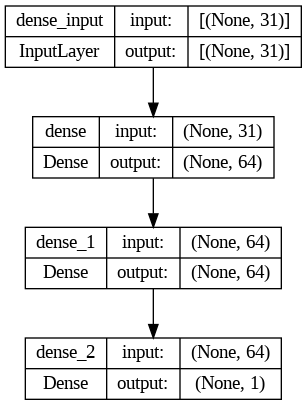

In [45]:
from tensorflow.keras.utils import plot_model

# Visualize the neural network architecture
plot_model(model, to_file='network.png', show_shapes=True, show_layer_names=True)


In [46]:
!pip install keras


# Results & Observations

## **All Calculated Results**

In [128]:
print('\nRFC \n',RFC);
print('\nSVM \n',SVM);
print('\nKNN \n',KNN);
print('\nXGB \n',XGB);
print('\nLR \n',LR);
print('\nANN \n',ANN);


RFC 
 {'best_accuracy': 0.9649122807017544, 'best_precision': 0.975609756097561, 'best_recall': 0.9302325581395349, 'best_f1': 0.9523809523809524, 'best_auc_roc': 0.9580740255486406, 'total_time': 117.32991218566895}

SVM 
 {'best_accuracy': 0.9824561403508771, 'best_precision': 1.0, 'best_recall': 0.9534883720930233, 'best_f1': 0.9761904761904763, 'best_auc_roc': 0.9767441860465116, 'total_time': 0.2256910800933838}

KNN 
 {'best_accuracy': 0.9473684210526315, 'best_precision': 0.9302325581395349, 'best_recall': 0.9302325581395349, 'best_f1': 0.9302325581395349, 'best_auc_roc': 0.9439895185063871, 'total_time': 0.002819538116455078}

XGB 
 {'best_accuracy': 0.9736842105263158, 'best_precision': 0.9761904761904762, 'best_recall': 0.9534883720930233, 'best_f1': 0.9647058823529412, 'best_auc_roc': 0.9697019325253848, 'total_time': 85.2696373462677}

LR 
 {'best_accuracy': 0.9912280701754386, 'best_precision': 1.0, 'best_recall': 0.9767441860465116, 'best_f1': 0.988235294117647, 'best_au

In [129]:
import matplotlib.pyplot as plt

# Define dictionaries for the results
results = {
    'RFC': RFC,
    'SVM': SVM,
    'KNN': KNN,
    'XGB': XGB,
    'LR': LR,
    'ANN': ANN
}

# Extract metrics for visualization
models = list(results.keys())
accuracy = [results[model]['best_accuracy'] for model in models]
precision = [results[model]['best_precision'] for model in models]
recall = [results[model]['best_recall'] for model in models]
f1 = [results[model]['best_f1'] for model in models]
auc_roc = [results[model]['best_auc_roc'] for model in models]
total_time = [results[model]['total_time'] for model in models]

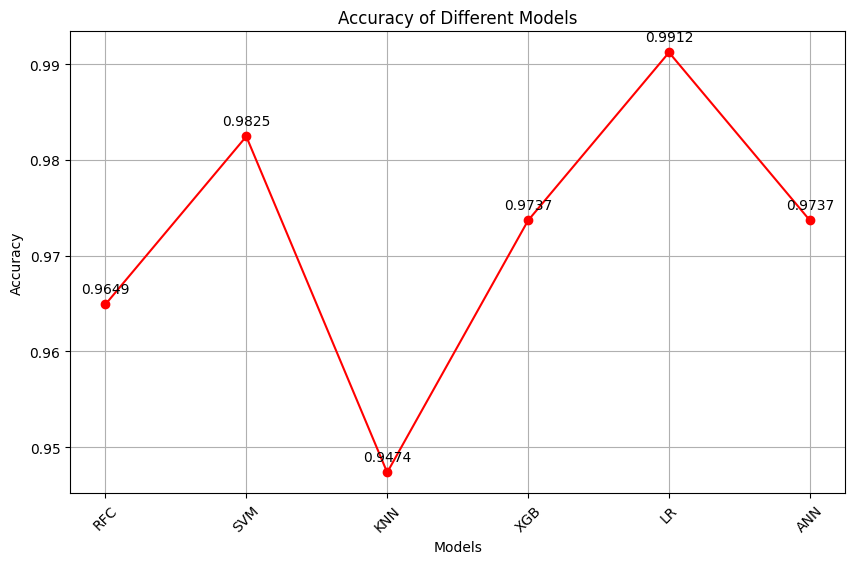

In [130]:
import matplotlib.pyplot as plt

# Accuracy plot using a line plot with original values annotated
plt.figure(figsize=(10, 6))
plt.plot(models, accuracy, marker='o', color='red', linestyle='-')
plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True)  # Add grid for better readability

# Annotate each data point with its original accuracy value
for i, acc in enumerate(accuracy):
    plt.annotate(f'{acc:.4f}', (models[i], acc), textcoords="offset points", xytext=(0,8), ha='center')

plt.show()


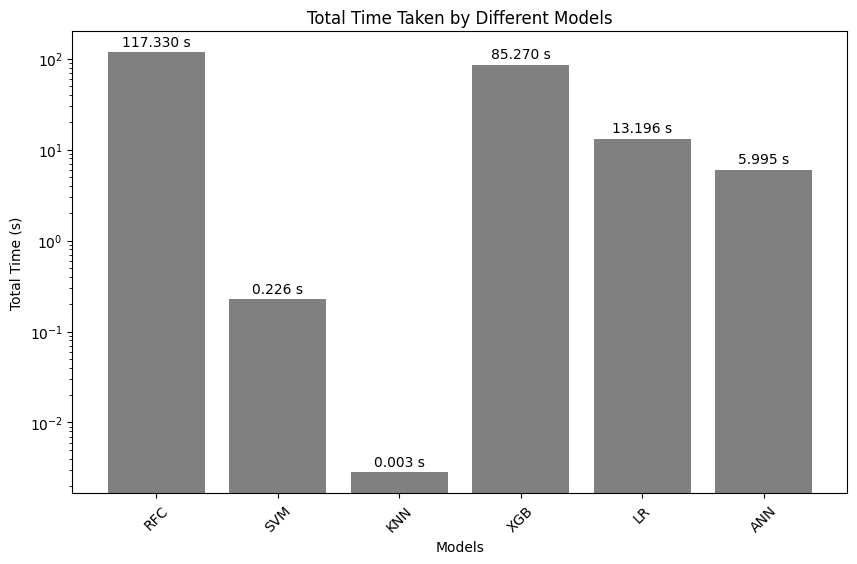

In [131]:
import matplotlib.pyplot as plt

# Total time plot on a logarithmic scale
plt.figure(figsize=(10, 6))
bars = plt.bar(models, total_time, color='gray')

plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Total Time Taken by Different Models')
plt.xlabel('Models')
plt.ylabel('Total Time (s)')
plt.xticks(rotation=45)

# Annotate each bar with its original value (in seconds)
for bar, time in zip(bars, total_time):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.1 * bar.get_height(),
             f"{time:.3f} s",
             ha='center',
             va='bottom')

plt.show()


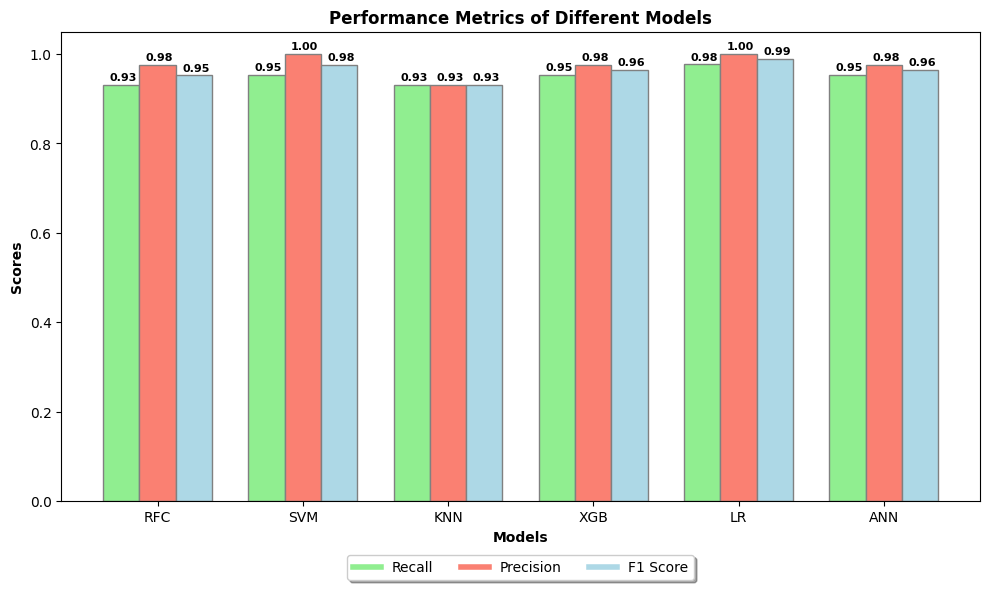

In [135]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = ['RFC', 'SVM', 'KNN', 'XGB', 'LR', 'ANN']
recall = [RFC['best_recall'], SVM['best_recall'], KNN['best_recall'],
          XGB['best_recall'], LR['best_recall'], ANN['best_recall']]
precision = [RFC['best_precision'], SVM['best_precision'], KNN['best_precision'],
             XGB['best_precision'], LR['best_precision'], ANN['best_precision']]
f1 = [RFC['best_f1'], SVM['best_f1'], KNN['best_f1'],
      XGB['best_f1'], LR['best_f1'], ANN['best_f1']]

# Bar width
bar_width = 0.25

# Set position of bars on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create grouped bar plot
plt.figure(figsize=(10, 6))

# Plot recall
plt.bar(r1, recall, color='lightgreen', width=bar_width, edgecolor='grey', label='Recall')

# Plot precision
plt.bar(r2, precision, color='salmon', width=bar_width, edgecolor='grey', label='Precision')

# Plot F1 score
plt.bar(r3, f1, color='lightblue', width=bar_width, edgecolor='grey', label='F1 Score')

# Add labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Performance Metrics of Different Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add values on top of each bar
for i in range(len(models)):
    plt.text(r1[i] - 0.08, recall[i] + 0.01, f'{recall[i]:.2f}', fontsize=8, fontweight='bold')
    plt.text(r2[i] - 0.08, precision[i] + 0.01, f'{precision[i]:.2f}', fontsize=8, fontweight='bold')
    plt.text(r3[i] - 0.08, f1[i] + 0.01, f'{f1[i]:.2f}', fontsize=8, fontweight='bold')

# Create custom legend
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

# Define legend elements
legend_elements = [Line2D([0], [0], color='lightgreen', lw=4, label='Recall'),
                   Line2D([0], [0], color='salmon', lw=4, label='Precision'),
                   Line2D([0], [0], color='lightblue', lw=4, label='F1 Score')]

# Create legend at bottom
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3)

# Show plot
plt.tight_layout()
plt.show()


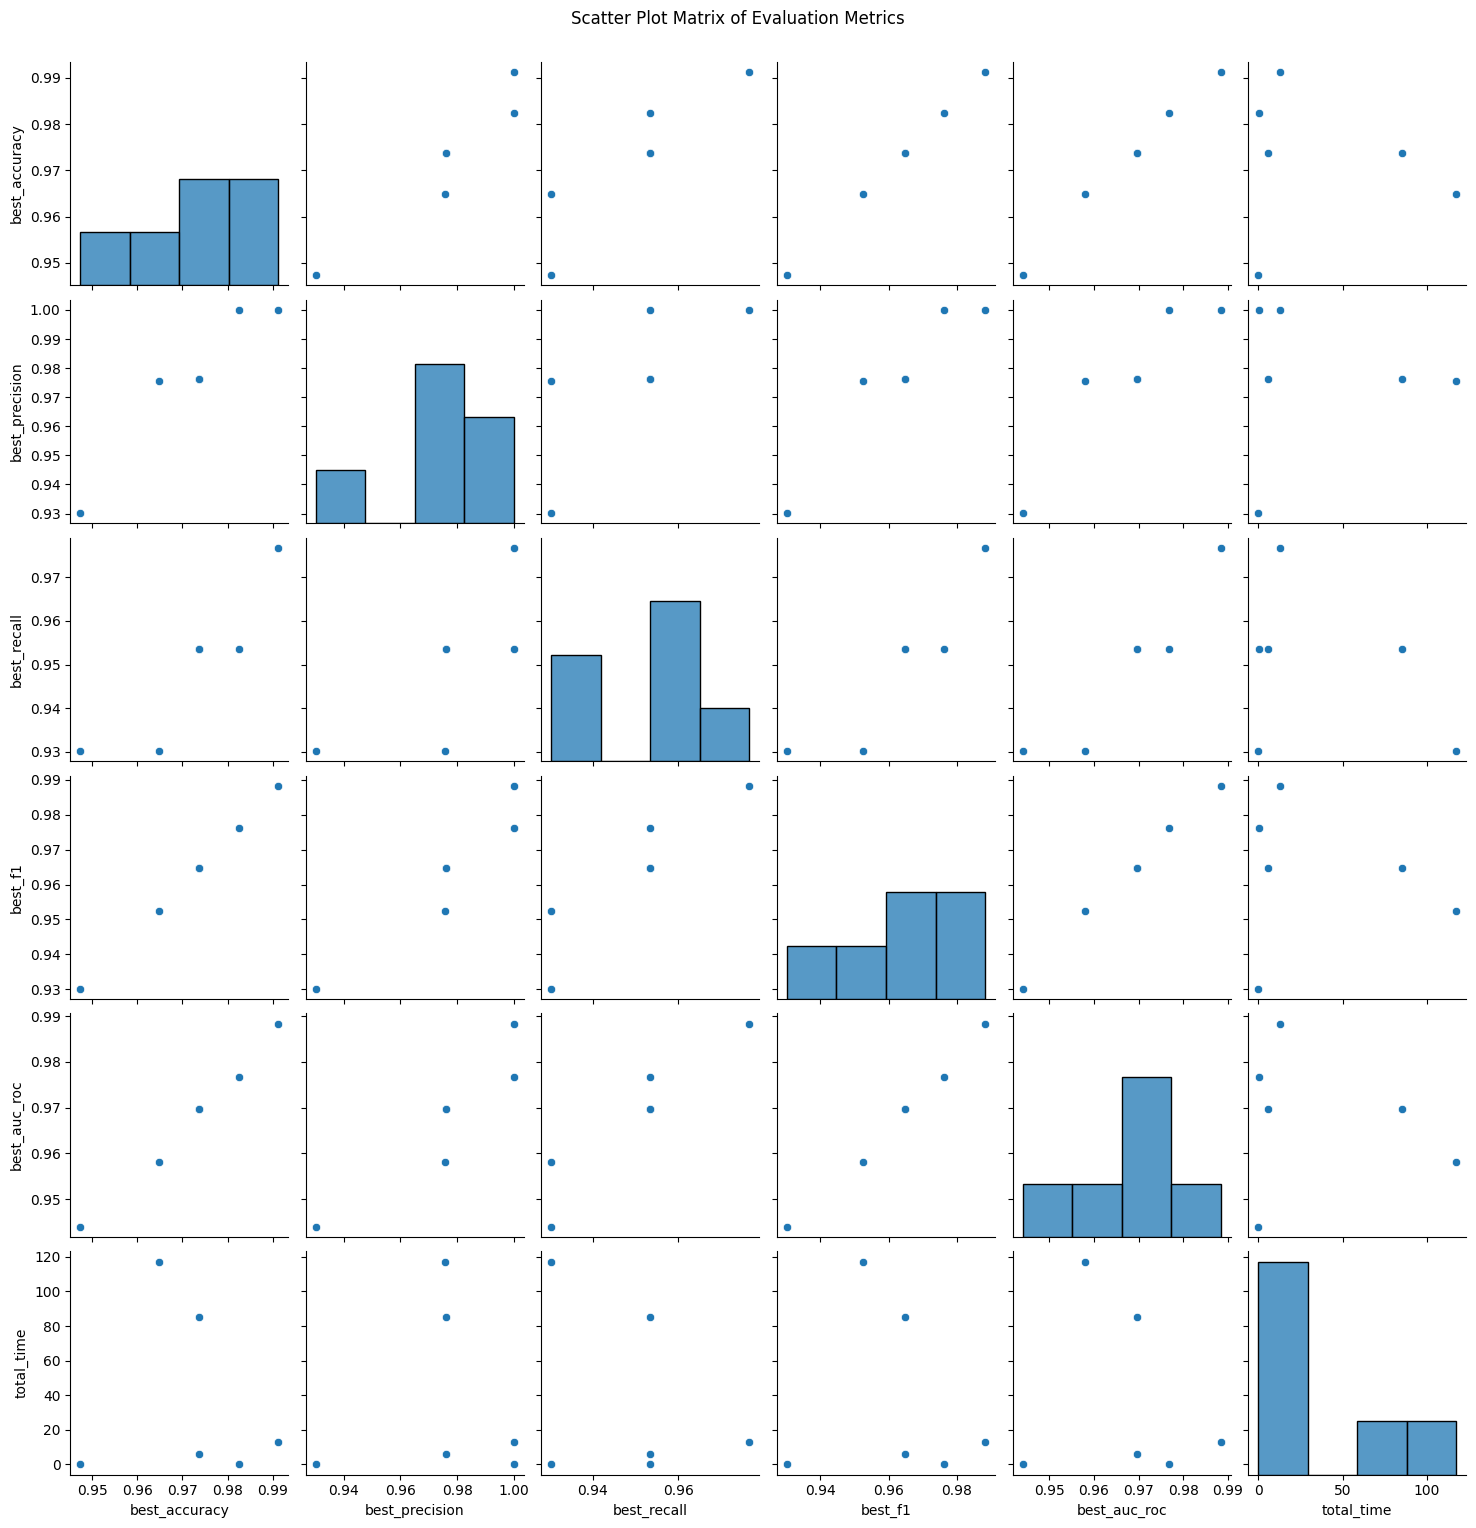

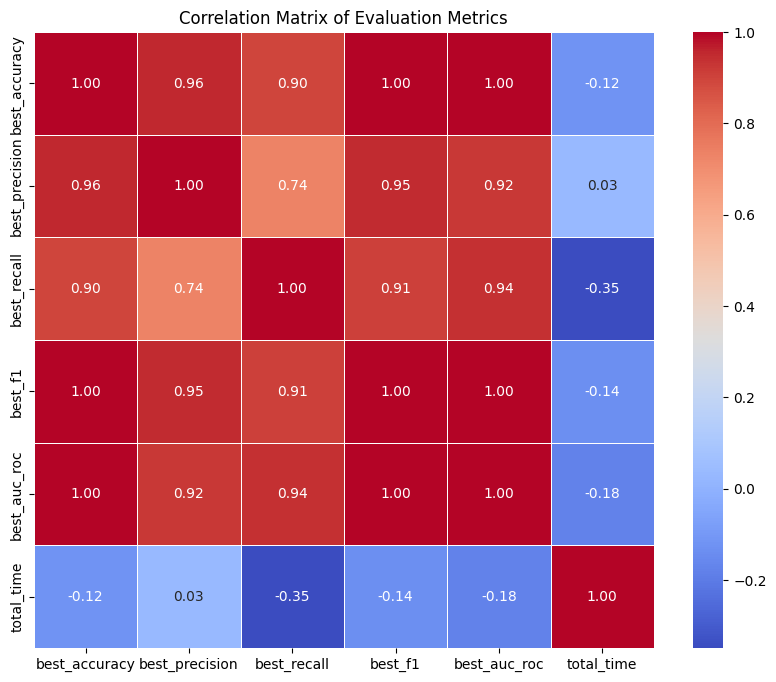

In [136]:
import numpy as np
import seaborn as sns
import pandas as pd

# Create a DataFrame for the results
df = pd.DataFrame(results).T

# Scatter plot matrix
sns.pairplot(df[['best_accuracy', 'best_precision', 'best_recall', 'best_f1', 'best_auc_roc', 'total_time']])
plt.suptitle('Scatter Plot Matrix of Evaluation Metrics', y=1.02)
plt.show()

# Correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Evaluation Metrics')
plt.show()


# Rough Work

``1)Introduction``

2)``Brief overview of cancer-related diseases and the importance of early detection``.
	--> Introducing the breast cancer dataset

3)```Data Collection and Preprocessing``
	--> Data Cleaning
	--> One Hot Echoding
	--> Other methods for preprocessing

4)``Exploratory Data Analysis (EDA)``
	--> Showing Vizulizations b/w different variables
	--> Common Patterns and Trend

5)``Feature Selection and Engineering``
	--> Techniques used for feature selection and engineering to improve model performance. Brief overview
	--> Importance of selecting relevant features for disease detection.

6)``Machine Learning Models``
	--> Alogo 1 [ DTC Classifer ]
		* Mathematical Intution
		* Code Implementation in Python sklearn
		* Key advantages and disadvantages
		* Hyperparameter-Tuning

	--> Alogo 2 [ SVM ]
		* Mathematical Intution
		* Code Implementation in Python sklearn
		* Key advantages and disadvantages
		* Hyperparameter-Tuning

	--> Alogo 3 [ Random Forests Classifer ]
		* Mathematical Intution
		* Code Implementation in Python sklearn
		* Key advantages and disadvantages
		* Hyperparameter-Tuning

	--> Alogo 4 [ Neural  Networks ]
		* Mathematical Intution
		* Code Implementation in Python sklearn
		* Key advantages and disadvantages
		* Hyperparameter-Tuning

7)``Model Evaluation``
	--> Code implementation using python sklearn
	--> Comparasion using Accuracy , Precison , Recall , F1-Score
	--> Visualization b/w different findings


8) ``Finding and Conclusion``

9) ``Future Contributions``

10) ``Refrences``

``

In [ ]:
# Sample code for Model Training

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing models after importing
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(random_state=42)
log_reg = LogisticRegression(max_iter=10000, random_state=42)
knn = KNeighborsClassifier()

# Training models
random_forest.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Predictions
rf_predictions = random_forest.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
log_reg_predictions = log_reg.predict(X_test)
knn_predictions = knn.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Recall:", recall_score(y_test, rf_predictions))

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print("XGBoost Recall:", recall_score(y_test, xgb_predictions))

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_predictions))
print("Logistic Regression Recall:", recall_score(y_test, log_reg_predictions))

print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))
print("KNN Recall:", recall_score(y_test, knn_predictions))

## **Sample**

### Sample Model Trainning - No Tuning

### Sample Model Trainning - HyperParameter Tuning

https://www.who.int/health-topics/cancer


https://www.who.int/news-room/fact-sheets/detail/breast-cancer


In [ ]:
import matplotlib.pyplot as plt

# Define number of units in each layer
input_size = 64
hidden_size = 64
output_size = 1

# Create lists for neuron positions
input_layer_y = [0.9]
hidden_layer_y1 = [0.7]
hidden_layer_y2 = [0.5]
output_layer_y = [0.3]

# Create lists for connection lines (x1, y1, x2, y2)
connections = [
    (0.1, input_layer_y[0], 0.3, hidden_layer_y1[0]),
    (0.2, input_layer_y[0], 0.4, hidden_layer_y1[0]),
    # ... (repeat for all connections between input and hidden layer 1)
    (0.7, hidden_layer_y1[0], 0.3, hidden_layer_y2[0]),
    (0.8, hidden_layer_y1[0], 0.4, hidden_layer_y2[0]),
    # ... (repeat for all connections between hidden layer 1 and hidden layer 2)
    (0.5, hidden_layer_y2[0], 0.7, output_layer_y[0]),
]

# Create the plot
plt.figure(figsize=(6, 4))

# Draw circles for neurons
plt.plot(0.25, input_layer_y[0], 'o', markersize=60, markerfacecolor='lightblue', markeredgewidth=2, markeredgecolor='blue')
for i in range(hidden_size):
    plt.plot(0.35 + i * 0.1, hidden_layer_y1[0], 'o', markersize=40, markerfacecolor='lightgreen', markeredgewidth=2, markeredgecolor='green')
for i in range(hidden_size):
    plt.plot(0.35 + i * 0.1, hidden_layer_y2[0], 'o', markersize=40, markerfacecolor='lightgreen', markeredgewidth=2, markeredgecolor='green')
plt.plot(0.75, output_layer_y[0], 'o', markersize=60, markerfacecolor='lightyellow', markeredgewidth=2, markeredgecolor='yellow')

# Draw lines for connections
for connection in connections:
    plt.plot([connection[0], connection[2]], [connection[1], connection[3]], '-b', alpha=0.5)

# Set labels
plt.xlabel('Network Position')
plt.ylabel('Layer Level')

# Set limits slightly bigger than neuron positions
plt.xlim(0, 1)
plt.ylim(0, 1)

# Add text labels for layers
plt.text(0.15, input_layer_y[0] + 0.05, 'Input Layer (64 units)', ha='center', fontsize=10)
plt.text(0.45, hidden_layer_y1[0] + 0.03, 'Hidden Layer 1 (64 units)', ha='center', fontsize=10)
plt.text(0.45, hidden_layer_y2[0] - 0.03, 'Hidden Layer 2 (64 units)', ha='center', fontsize=10)
plt.text(0.65, output_layer_y[0] - 0.05, 'Output Layer (1 unit)', ha='center', fontsize=10)

# Remove unnecessary elements from the plot (manually using axis and spines)
plt.tick_params(left=False, bottom=False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the image (optional)
# plt.savefig('ann_diagram.png')

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
import time

# Function to create the model
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(units=64, activation=activation, input_dim=X_train.shape[1]))
    model.add(Dense(units=64, activation=activation))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Start timing
start_time = time.time()

# Define hyperparameters grid
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'activation': ['relu', 'tanh', 'sigmoid']
}

# Create KerasClassifier wrapper
from keras.wrappers.scikit_learn import KerasClassifier
keras_model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=100, verbose=0)

# Perform grid search
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

# End timing
end_time = time.time()
total_time = end_time - start_time

# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Evaluate the best model
best_model = grid_result.best_estimator_
test_loss, test_accuracy = best_model.model.evaluate(X_test, y_test)

print("Test Accuracy:", test_accuracy)
print(f"Total Time: {total_time} seconds")
